# <2> Seaborn 라이브러리 - 고급 그래프 도구

 : Seaborn은 Matplotlib의 기능과 스타일을 확장한 파이썬 시각화 도구의 고급 버전임. Seaborn을 임포트할 때는 'sns'라는 약칭을 주로 사용.  

# [데이터셋 가져오기]

'titanic' 데이터셋을 사용.
 - Seaborn의 load_dataset( )함수를 사용하여 데이터 프레임으로 가져온다. 

In [3]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

# [회귀선이 있는 산점도]

 - regplot( )함수는 서로 다른 2개의 연속 변수 사이의 산점도를 그리고, 선형 회귀 분석에 의한 회귀선을 함께 나타냄. 
       - fit_reg=False 옵션 -> 회귀선을 안 보이게 함. 

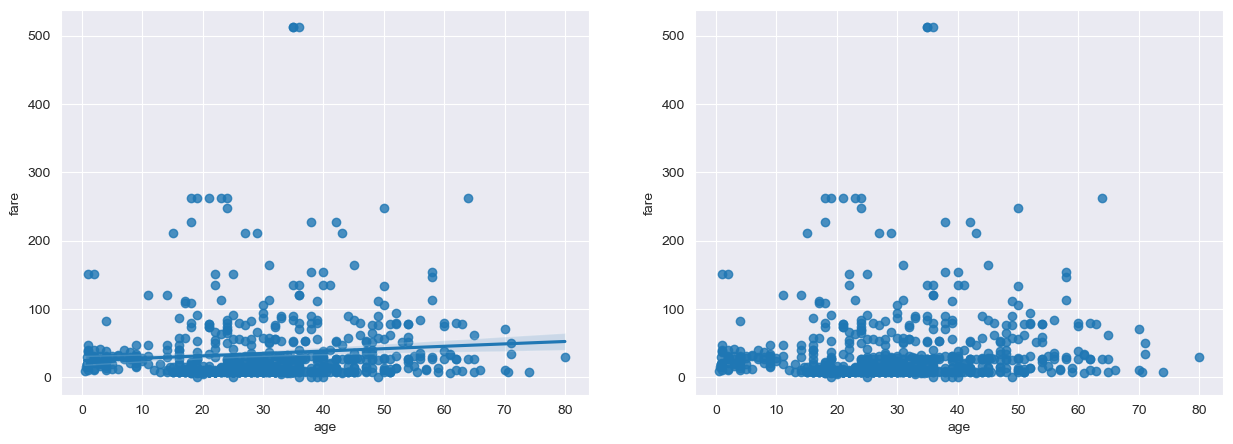

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

#스타일 테마 설정(darkgrid, whitegrid,dark, white, ticks)
sns.set_style('darkgrid')

#그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#그래프 그리기-선형회귀선 표시
sns.regplot(x='age',y='fare', data=titanic, 
            ax = ax1)
sns.regplot(x='age',y='fare', data=titanic, 
            ax = ax2, fit_reg=False)

plt.show()

# [히스토그램/커널 밀도 그래프]

 - 단변수 데이터의 분포를 확인할 때 distplot() 함수를 이용.
    - hist=False옵션을 추가하면 히스토그램이 표시되지 않음.
    - kde=False옵션을 추가하면 커널 밀도 그래프를 표시하지 않음. 

C:\Users\june0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


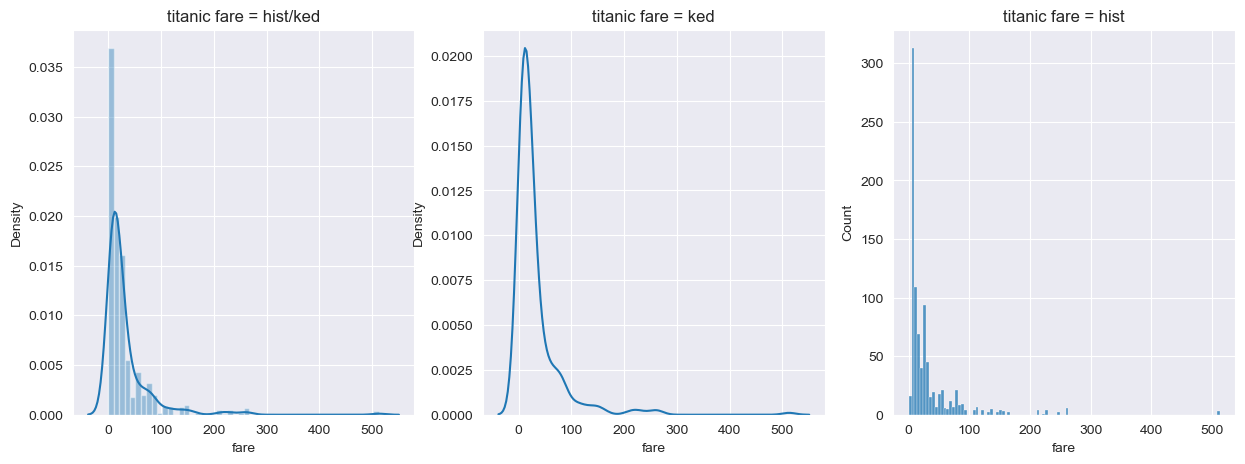

In [11]:
#그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

#distplot
sns.distplot(titanic['fare'], ax=ax1)

#kdeplot
sns.kdeplot(x='fare', data=titanic, ax=ax2)

#histplot
sns.histplot(x='fare', data=titanic, ax=ax3)

#차트 제목 표시
ax1.set_title('titanic fare = hist/ked')
ax2.set_title('titanic fare = ked')
ax3.set_title('titanic fare = hist')

plt.show()

# [히트맵]

 - heatmap()
 - 2개의 범주형 변수를 각각 x,y축에 놓고 데이터를 매트릭스 형태로 분류함. 
     - aggfunc='size'옵션은 데이터 값의 크기를 기준으로 집계함. 
     - cbar=True 옵션은 컬러바를 표시해줌. 

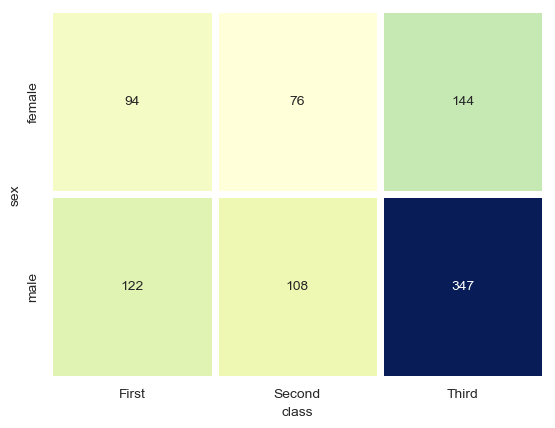

In [12]:
#피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

#히트맵 그리기
sns.heatmap(table, annot=True, fmt='d',  #데이터값 표시여부, 정수형 포맷
           cmap='YlGnBu',                 #컬러 맵
           linewidth=5,                   #구분선
           cbar=False)                   #컬러 바 표시 여부

plt.show()

# [범주형 데이터의 산점도]

 : 범주형 변수에 들어 있는 각 범주별 데이터의 분포를 확인하는 방법
  - stripplot()함수와 swarmplot()함수를 사용.
  (swarmplot함수는 데이터의 분산까지 고려.)

C:\Users\june0\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


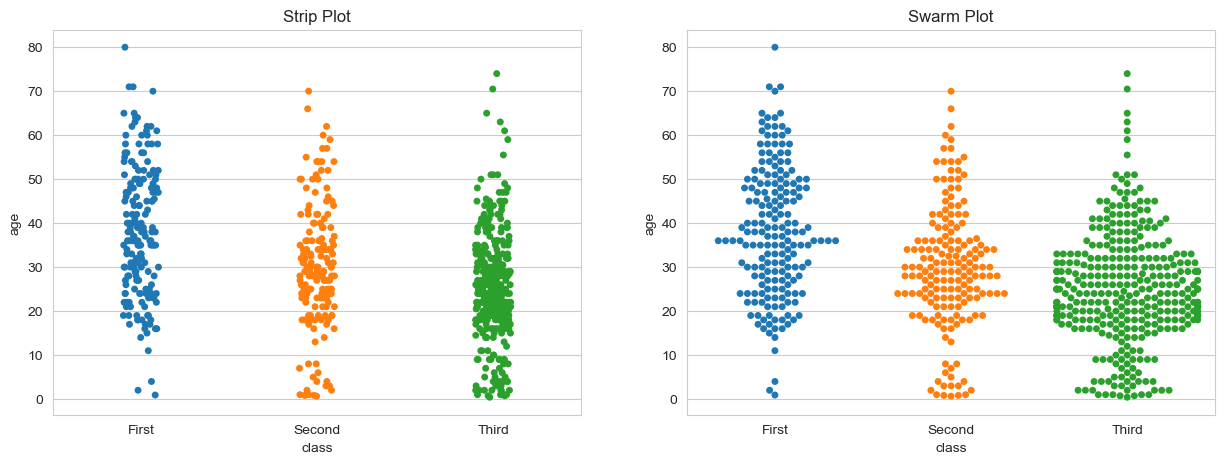

In [18]:
sns.set_style('whitegrid')

#그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#이산형 변수의 분포 - 데이터 분산 미고려
sns.stripplot(x="class", y="age", data=titanic, ax=ax1)

#이산형 변수의 분포 - 데이터 분산 고려
sns.swarmplot(x="class", y="age", data=titanic, ax=ax2)

#차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')

plt.show()

# [막대 그래프]

 -barplot() 

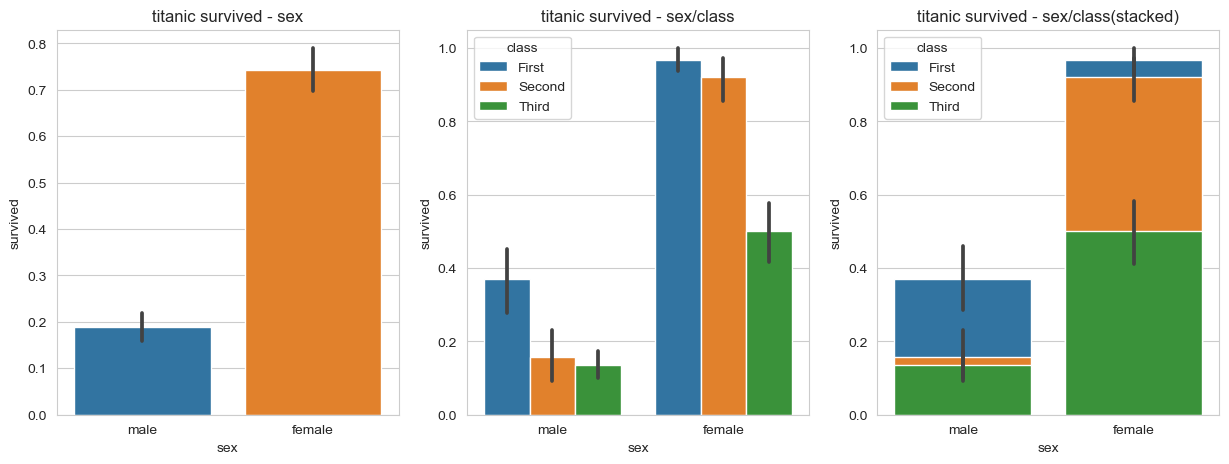

In [19]:
#그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

#x,y축에 변수 할당
sns.barplot(x='sex',y='survived', data=titanic, ax=ax1)

#x축, y축에 변수 할당하고 hue옵션 추가
sns.barplot(x='sex',y='survived',hue='class', data=titanic, ax=ax2)

#x축, y축에 변수 할당하고 hue옵션 추가하여 누적 출력
sns.barplot(x='sex',y='survived',hue='class',dodge=False,data=titanic, ax=ax3)

#차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

# [빈도 그래프]

 - 각 범주에 속하는 데이터 개수를 막대 그래프로 나타내느 countplot( )함수

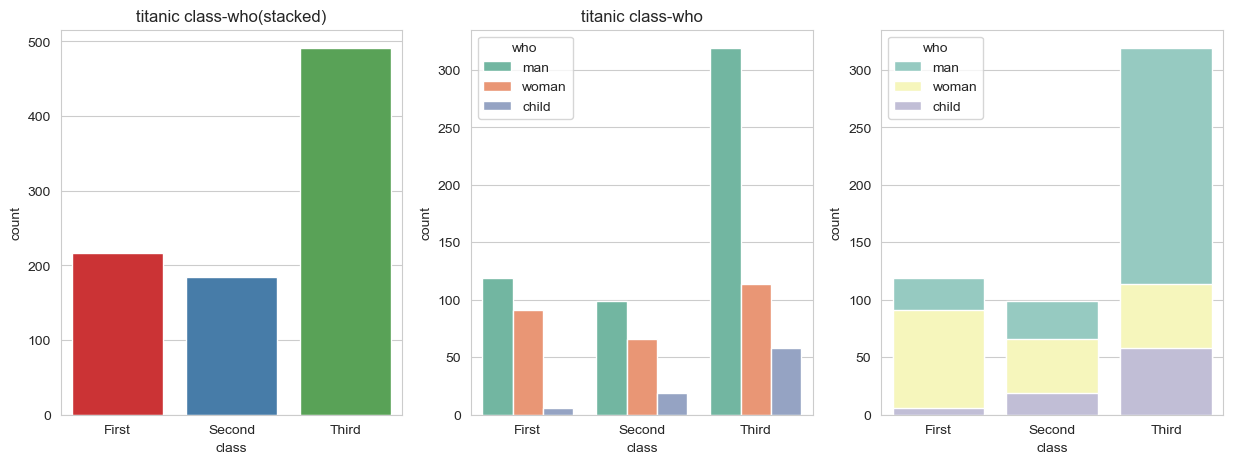

In [21]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3) 

#기본값
sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)

#hue옵션에 'who'추가
sns.countplot(x='class', hue='who',palette='Set2', data=titanic, ax=ax2)

#dodge=False 옵션 추가
sns.countplot(x='class', hue='who',palette='Set3', dodge=False, data=titanic, ax=ax3)

#차트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class-who')
ax1.set_title('titanic class-who(stacked)')

plt.show()

# [박스 플롯/바이올린 그래프]

 - 박스플롯은 범주형 데잍터 분포와 주요 통계 지표를 함께 제공. 
 - 커널 밀도 함수 그래프를 y축 방향에 추가하여 바이올린 그래프를 그리는 경우도 있음.

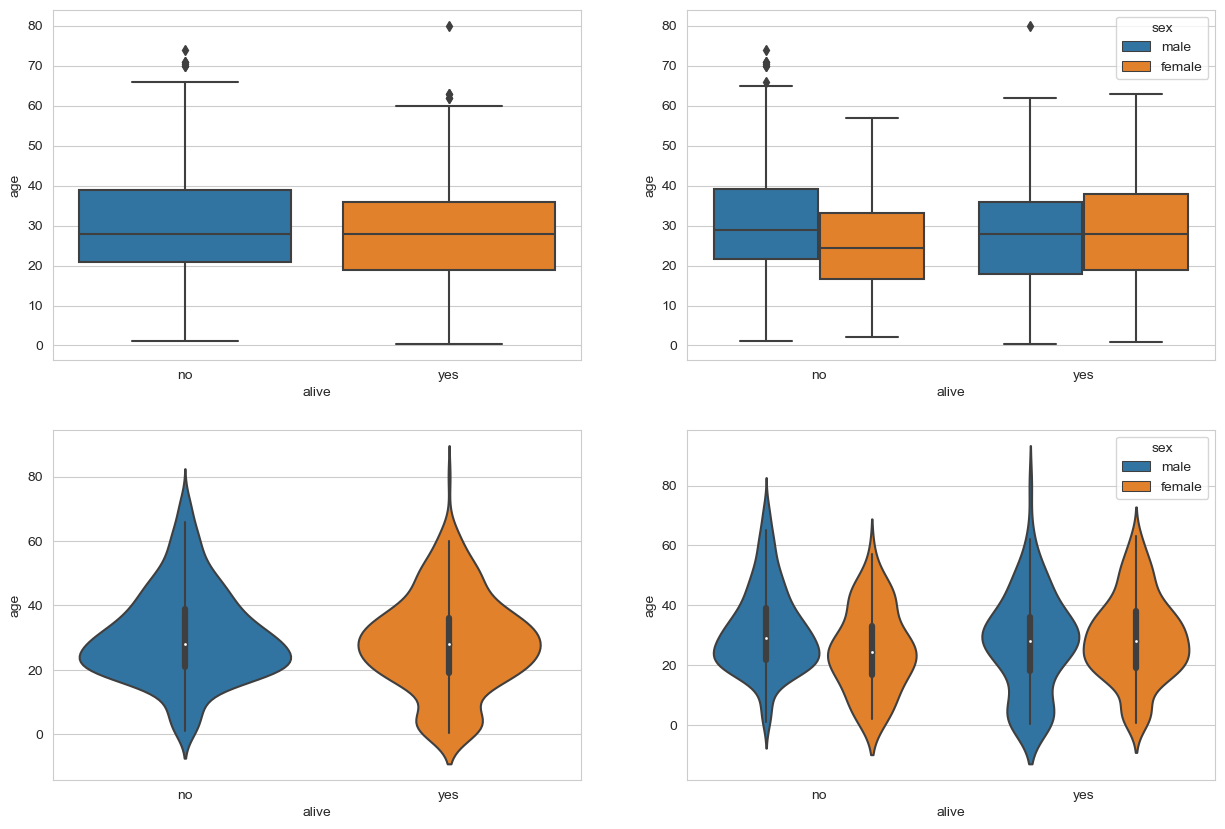

In [22]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

#박스플롯 - 기본값
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)

#박스플롯 - hue 변수 추가
sns.boxplot(x='alive', y='age',hue='sex', data=titanic, ax=ax2)

#바이올린 그래프 - 기본값
sns.violinplot(x='alive',y='age', data=titanic, ax=ax3)

#바이올린 그래프 - hue 변수 추가
sns.violinplot(x='alive',y='age', hue='sex',data=titanic, ax=ax4)

plt.show()

# [조인트 그래프]

joinplot() 함수는 산점도를 기본으로 표시하고, x-y축에 각 변수에 각 변수에 대한 히스토그램을 동새에 보여줌. 

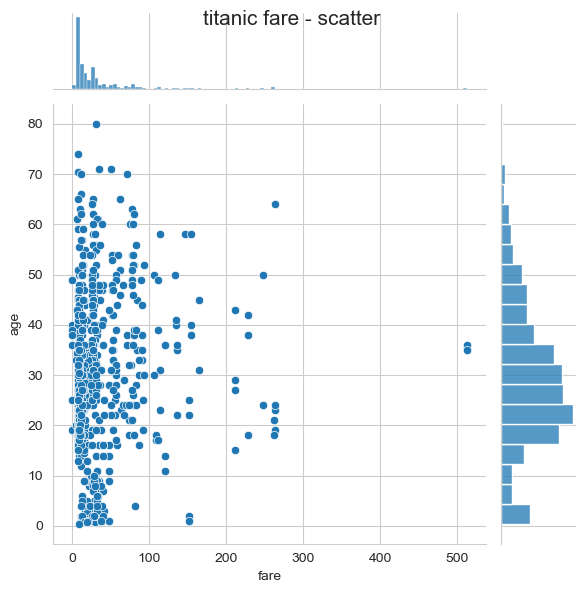

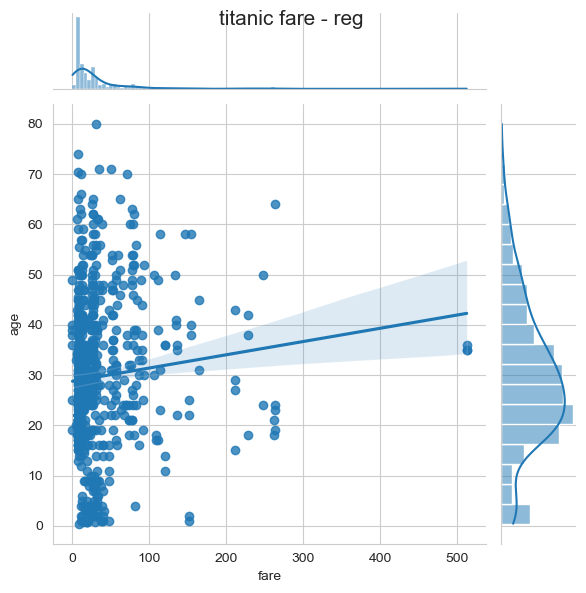

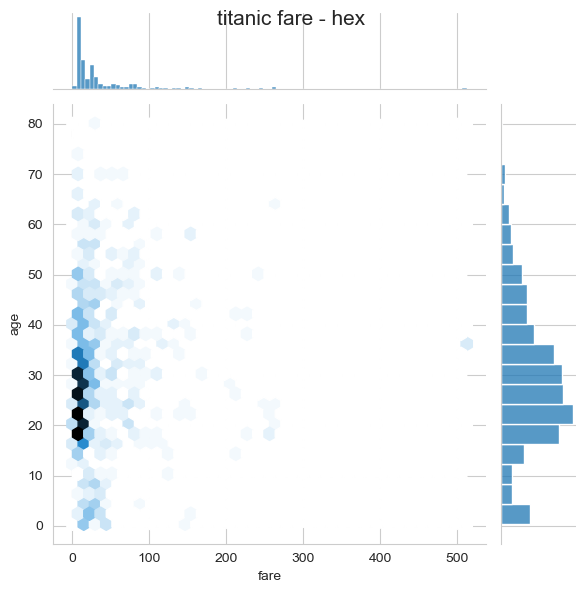

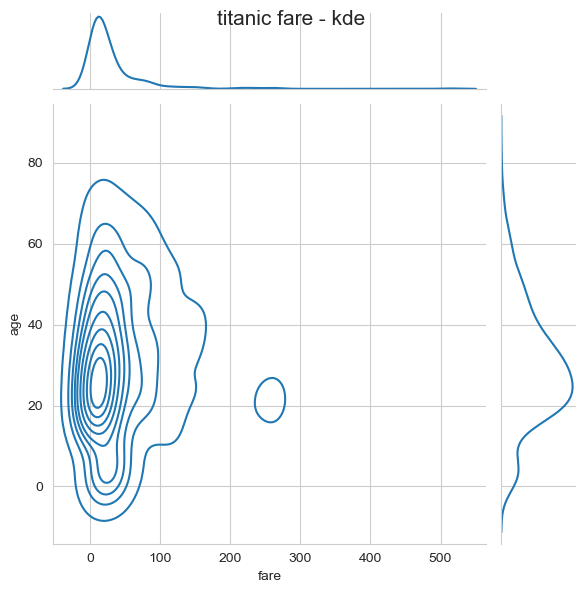

In [25]:
sns.set_style('whitegrid')

#조인트 그래프 - 산점도(기본)
j1 = sns.jointplot(x='fare', y='age', data=titanic)

#조인트 그래프 - 회귀선
j2 = sns.jointplot(x='fare', y='age', kind='reg',data=titanic)

#조인트 그래프 - 육각그래프
j3 = sns.jointplot(x='fare', y='age', kind='hex',data=titanic)

#조인트 그래프 - 커널 밀집 그래프
j4 = sns.jointplot(x='fare', y='age', kind='kde',data=titanic)

#차트 제목 표시
j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()

# [조건을 적용하여 화면을 그리드로 분할하기]

 :FacetGrid()함수는 행,열 방향으로 서로 다른 조건을 적용하여 여러개의 서브플롯을 만듦. 
 
 : 각 서브 플롯에 적용할 그래프 종류를 map()메소드를 이용하여 그리드 객체에 전달.

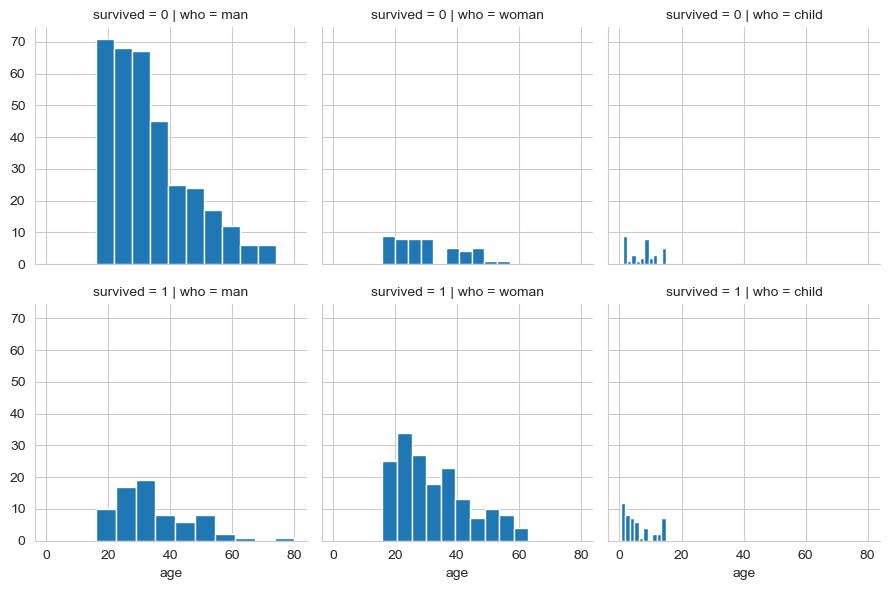

In [27]:
sns.set_style('whitegrid')

#조건에 따라 그리드 나누기
g = sns.FacetGrid(data=titanic, col='who', row='survived')

#그래프 적용하기
g = g.map(plt.hist, 'age')

# [이변수 데이터의 분포]

pairplot( )함수는 인자로 전달되는 데이터프레임의 열을 두개씩 짝을 지을 수 있는 모든 조합에 대해 표현.

그래프를 그리기 위해 만들어진 짝의 개수만큼 화면을 그리드로 나눔. 

각 그리드에 두 변수간의 관계를 나타내는 그래프를 하나씩 그림.

(같은 변수끼리 짝을 이루는 대각선 방향은 히스토그램, 서로 다른 변수 간에는 산점도)

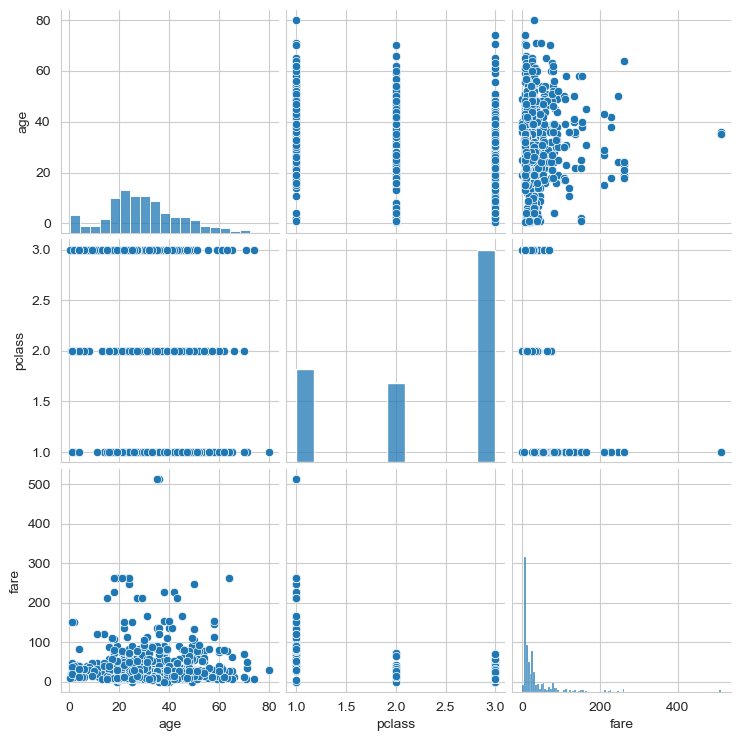

In [28]:
#titanic 데이터셋 중에서 분석 데이터 선택하기
titanic_pair = titanic[['age','pclass','fare']]

#조건에 따라 그리드 나누기
g = sns.pairplot(titanic_pair)

# <3> Folium 라이브러리 - 지도 활용

folium 라이브러리는 지도 위에 시각화할 때 유용한 도구.

# [Folium 설치하기]

아나콘다의 경우에도 설치가 필요.

# [지도 만들기]

Folium 라이브러리의 Map() 함수를 이용하면 간단하게 지도 객체를 만들 수 있음. 

 - 지도화면은 줌 기능과 화면이동이 모두 가능. 
 - Folium은 웹 기반 지도를 만들기 때문에, 오직 웹 환경에서만 지도를 확인할 수 있음.
 - Map() 함수의 location 옵션에 [위도, 경도] 수치를 입력하면 그지점을 중심으로 지도를 보여줌.
 - zoom_start 옵션을 사용하면 화면 확대 비율을 조절할 수 있음.

In [31]:
import folium

#서울 지도 만들기
seoul_map = folium.Map(location=[37055,126.98], zoom_start=12)

#지도를 HTML 파일로 저장하기
seoul_map.save('C:/data/seoul.html')

# [지도 스타일 적용하기]

Map()함수에 tiles 옵션을 적용하면 지도에 적용하는 스타일을 변경하여 지정할 수 있음. 

-> 최근 정보 : 더이상 tiles옵션을 지원하지 않는다고 함.

In [35]:
#서울 지도 만들기
seoul_map2 = folium.Map(location=[37.55,126.98],tiles='Stamen Terrain',
                        zoom_start=12)  #산악 지형 등의 지형이 보다 선명하게 드러난다
seoul_map3 = folium.Map(location=[37.55,126.98],tiles='Stamen Toner',
                        zoom_start=15)    #흑백 스타일로 도로망을 강조해서 보여준다

#지도를 HTML 파일로 저장하기
seoul_map2.save('C:\data\seoul2.html')
seoul_map3.save('C:\data\seoul3.html')

ValueError: Custom tiles must have an attribution.

# [지도에 마커 표시하기]

마커 위치를 표시하려면 Marker() 함수에 위도, 경도 정보를 전달함. 

popup옵션을 추가하면 마커를 클릭했을 때 팝업창에 표시해주는 텍스트를 넣을 수 있음.

In [38]:
import pandas as pd
import folium

#대학교 리스트를 데이터 프레임으로 변환
df = pd.read_excel('C:\data\서울지역 대학교 위치.xlsx', engine='openpyxl')

#서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98],zoom_start=12)

#대학교 위치 정보를 Marker로 표시
for name,lat,lng in zip(df.index,df.위도, df.경도):
    folium.Marker([lat,lng], popup=name).add_to(seoul_map)
    
#지도를 HTML 파일로 저장하기
seoul_map.save('C:\data\seoul_colleges.html')

지도에 원형 마커를 표시. CircleMaker() 함수를 사용. 

원형 마커의 크기, 색상, 투명도 등을 설정할 수 있음.

In [39]:
#대학교 위치 정보를 CircleMarker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
  folium.CircleMarker([lat,lng],
                      radius=10,             #원의 반지름
                      color='brwon',         #원의 둘레 색상
                      fill=True,
                      fill_color='coral',    #원을 채우는 색
                      fill_opacity=0.7,      #투명도
                      popup=name
                      ).add_to(seoul_map)

#지도를 HTML 파일로 저장하기
seoul_map.save('C:\data\seoul_colleges2.html')

# [지도 영역에 단계구분도 표시하기]

지도상의 어떤 경계에 둘러싸인 영역에 색을 칠하거나 음영 등으로 정보를 나타내는 시각화 방법.

Choropleth( )함수를 이용.

In [41]:
import pandas as pd
import folium
import json

#경기도 인구변화 데이터를 불러와서 데이터프레임으로 변환
file_path = 'C:\data\경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col='구분', engine='openpyxl')
df.columns = df.columns.map(str)

#경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path = 'C:\data\경기도행정구역경계.json'
try:
  geo_data = json.load(open(geo_path,encoding='utf-8'))
except:
  geo_data = json.load(open(geo_path,encoding='utf-8-sig'))


#경기도 지도 만들기
g_map = folium.Map(location=[37.5502,126.982],zoom_start=9)

#출력할 연도 선택 (2007~2017 중에서 선택)
year = '2007'

#Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data = geo_data,                                            #지도 경계
                  data = df[year],                                                #표시하려는 데이터
                  coulmns = [df.index,df[year]],                                  #열 지정
                  fill_color = 'YlOrRd',fill_opacity = 0.7,line_opacity=0.3,
                  threshold_scale = [10000,100000,300000,500000,700000],
                  key_on = 'feature.properties.name'
                  ).add_to(g_map)

#지도를 HTML 파일로 저장하기
g_map.save('C:\data\gyonggi_population_'+year+'.html')